In [1]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

## Under the hood

In [18]:
probs = [0.01, 0.05, 0.1]
sizes = np.linspace(0.2, 0.8, 20)


gamma = 2
Y = np.linspace(-5, 5, 1000)
prob_catastrophe=0.1
catastrophe_size=0.2
lambda_vsl=10000
scale=0.5
D = (1 + (gamma-1)*lambda_vsl)**(-1/(gamma-1))
D

9.999000099990002e-05

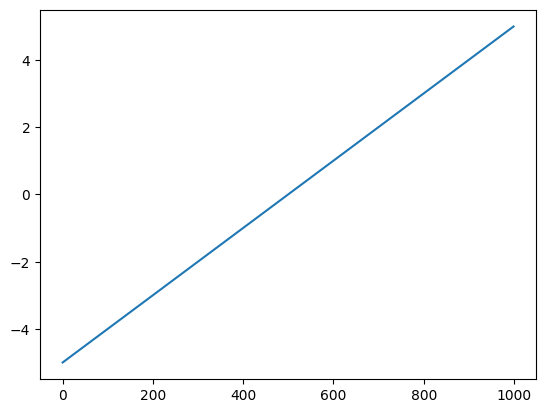

In [3]:
plt.plot(Y)

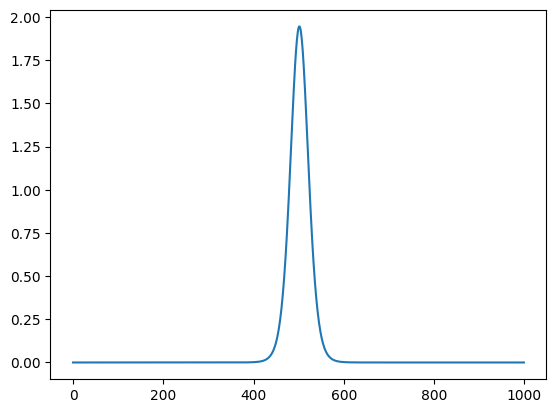

In [4]:
normal_dist = t.pdf(Y, df=10, loc=0.02, scale=0.2)
plt.plot(normal_dist)

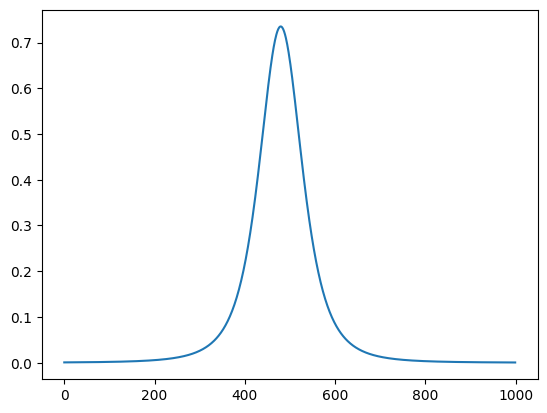

In [5]:
catastrophe_dist = t.pdf(Y, df=3, loc=-catastrophe_size, scale=scale)
combined_dist = (1-prob_catastrophe)*normal_dist + prob_catastrophe*catastrophe_dist
plt.plot(catastrophe_dist)

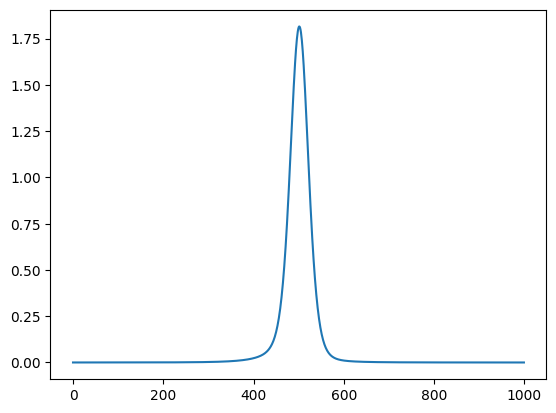

In [6]:
plt.plot(combined_dist)

In [7]:
np.log(D)

-9.210440366976515

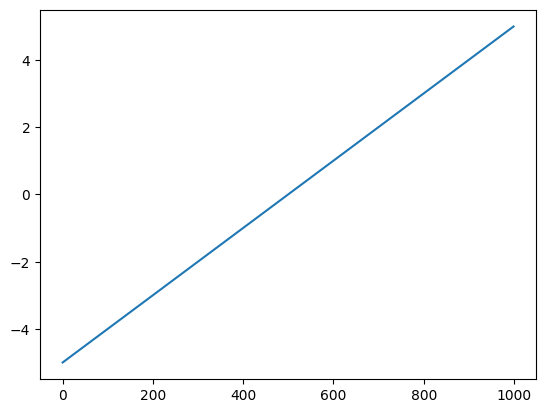

In [8]:
bounded_y = np.maximum(Y, np.log(D))
plt.plot(bounded_y)

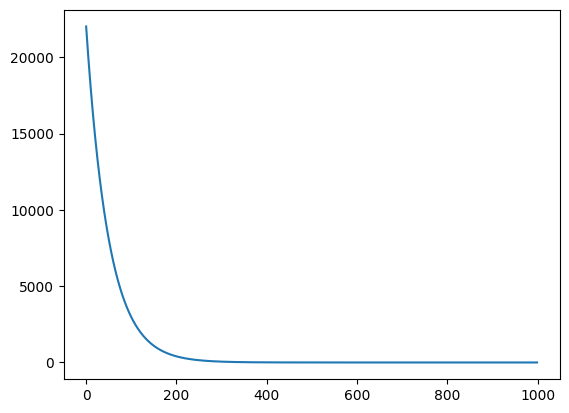

In [16]:
plt.plot(np.exp(-gamma*bounded_y))

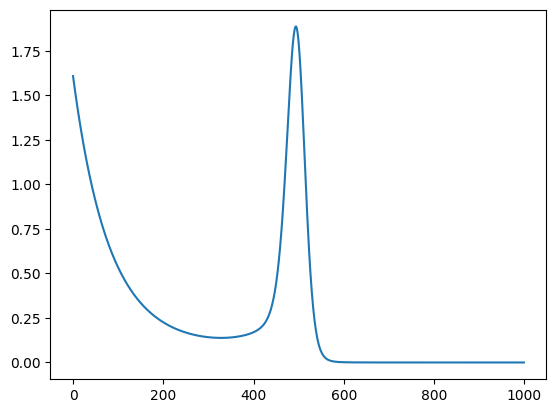

In [9]:
integrand = np.exp(-gamma*bounded_y) * combined_dist
plt.plot(integrand)

In [10]:
EM = np.trapz(integrand, Y)
EM

2.742332577602159

## Helpers

In [11]:
gamma = 2 #relative risk aversion - bigger value more willing to pay to avoid catastrophes
Y = np.linspace(-5, 5, 1000)
# Scenarios
probs = [0.01, 0.05, 0.1]
sizes = np.linspace(0.2, 0.8, 20)
#how much willing to pay to avoid disaster
#100- personal level
#1000 - civilisation level
#10000 - existential risk level
lambdas = [100, 1000, 10000] 

def calculate_wtp(Y, prob_catastrophe, catastrophe_size, lambda_vsl, scale=0.5):
    #weitzman 'On Modeling and Interpreting the Economics of Catastrophic Climate Change' formula 16
    #D - minimal consumption we are willing to tolerate
    D = (1 + (gamma-1)*lambda_vsl)**(-1/(gamma-1))
    #normal times on average 2% increase
    normal_dist = t.pdf(Y, df=10, loc=0.02, scale=0.2)
    #distribution of catastrophe  fat-tailed, negative growth, higher uncertainty
    catastrophe_dist = t.pdf(Y, df=3, loc=-catastrophe_size, scale=scale)
    combined_dist = (1-prob_catastrophe)*normal_dist + prob_catastrophe*catastrophe_dist
    #Cant fall below D, makes EM finite, log turns D into growth terms like Y is
    bounded_y = np.maximum(Y, np.log(D))
    #np.exp(-gamma*bounded_y) - stochastic discount factor, how much value future consumption
    #expected outcome times probability of outcome
    integrand = np.exp(-gamma*bounded_y) * combined_dist
    # integrate to get E[M] - expected stochastic discount factor
    EM = np.trapz(integrand, Y)
    # WTP = 1 - 1/E[M], fraction of consumption we are willing to give up
    #If E[M] = 2,future consumption worth 2× present,
    #WTP - would give up 0.5 units now for 1 unit in future 
    return 1 - 1/EM


def plot_results(gamma, Y, probs, sizes, lambdas, scale=0.5):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

    # Plot 1: Different probabilities
    styles = ['-', '--', '-.']
    markers = ['o', 's', '^']
    for i, p in enumerate(probs):
        wtp = [calculate_wtp(Y, p, s, 1000, scale=scale) for s in sizes]
        ax1.plot(sizes*100, np.array(wtp)*100, 
                 label=f'p={p:.1%}',
                 linestyle=styles[i],
                 marker=markers[i],
                 markevery=3)

    ax1.set_title('Maksevalmidus vs katastroofi suurus\n(λ=1000)')
    ax1.set_xlabel('Katastroofi suurus\n(% tarbimise vähenemist)')
    ax1.set_ylabel('Maksevalmidus\n(% praegusest tarbimisest)')
    ax1.legend()
    ax1.grid(True)

    # Plot 2: Different λ values
    p = 0.05
    for i, l in enumerate(lambdas):
        wtp = [calculate_wtp(Y, p, s, l, scale=scale) for s in sizes]
        ax2.plot(sizes*100, np.array(wtp)*100, 
                 label=f'λ={l}',
                 linestyle=styles[i],
                 marker=markers[i],
                 markevery=3)

    ax2.set_title('Maksevalmidus vs katastroofi suurus\n(p=5%)')
    ax2.set_xlabel('Katastroofi suurus\n(% tarbimise vähenemist)')
    ax2.set_ylabel('Maksevalmidus\n(% praegusest tarbimisest)')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    print("\nWTP values for different λ at 50% catastrophe:")
    for l in lambdas:
        wtp = calculate_wtp(Y, 0.05, 0.5, l)
        print(f"λ={l}: WTP={wtp*100:.1f}%")


## Plot

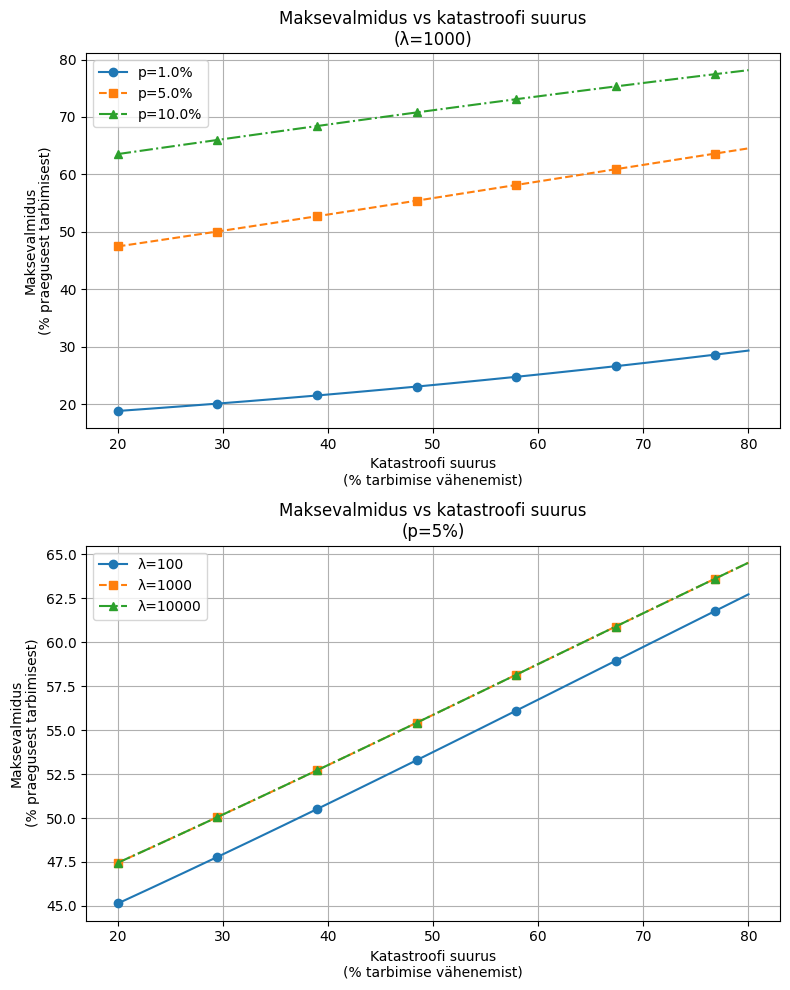


WTP values for different λ at 50% catastrophe:
λ=100: WTP=53.8%
λ=1000: WTP=55.9%
λ=10000: WTP=55.9%


In [12]:
plot_results(gamma, Y, probs, sizes, lambdas)

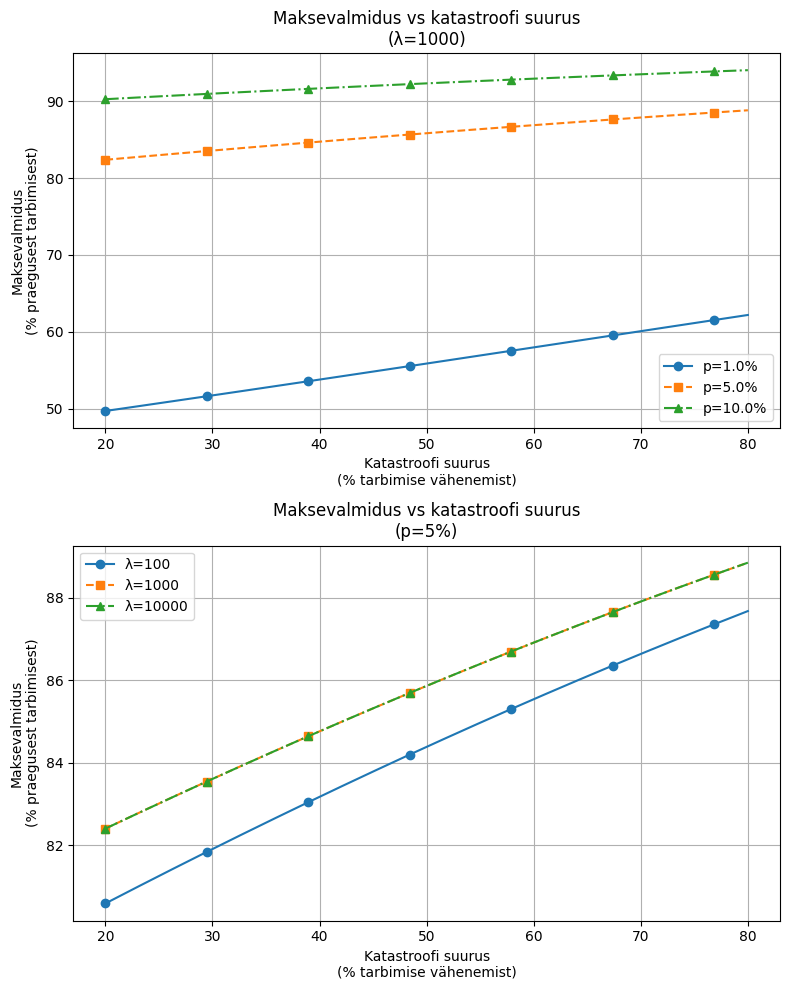


WTP values for different λ at 50% catastrophe:
λ=100: WTP=53.8%
λ=1000: WTP=55.9%
λ=10000: WTP=55.9%


In [13]:
#more uncertainty about catastrophe
plot_results(gamma, Y, probs, sizes, lambdas, scale=1.0)

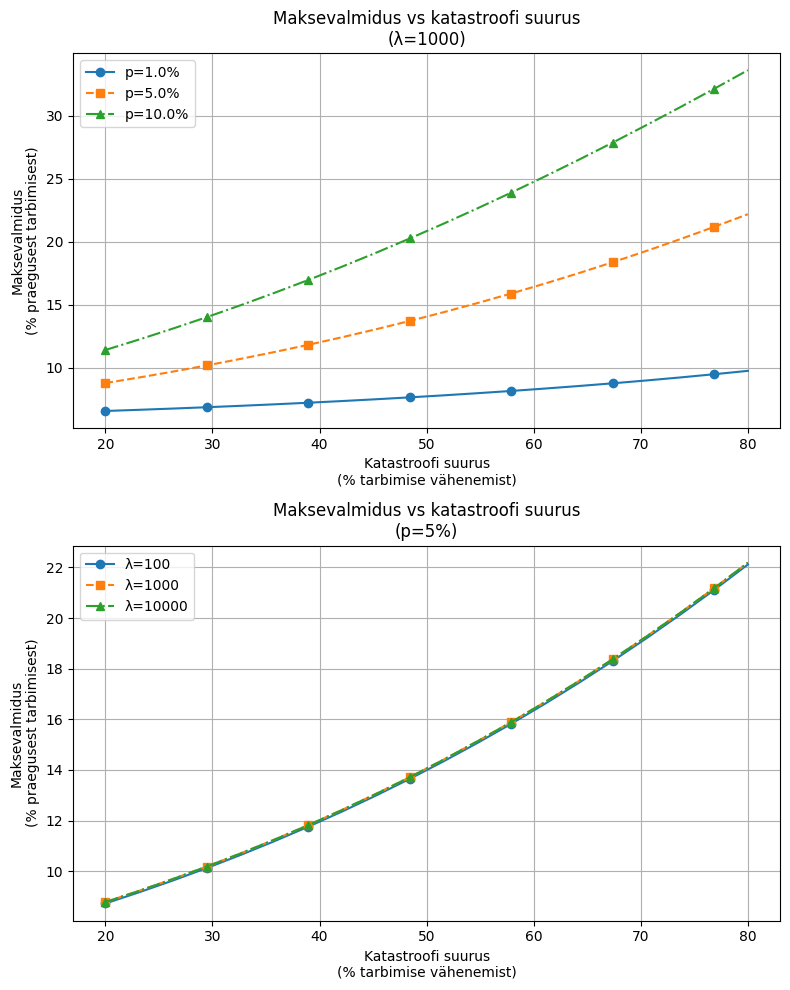


WTP values for different λ at 50% catastrophe:
λ=100: WTP=53.8%
λ=1000: WTP=55.9%
λ=10000: WTP=55.9%


In [14]:
#less uncertainty
plot_results(gamma, Y, probs, sizes, lambdas, scale=0.1)